<a href="https://colab.research.google.com/github/yegisafari/RL-Project-2/blob/main/RL_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reinforcement-Learning-RL
##Project 2
##Bandit Learning Algorithms
##Yeganeh Safari

Part 1
Consider a simple 5 × 5 gridworld problem, described below. This is the simplest abstraction of a reinforcement learning problem that allows us to benchmark and compare various learning algorithms to one another and is known as the ‘gridworld’ environment.


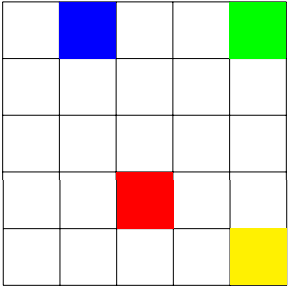

Each of the 25 cells of the gridworld represent a possible state of the world. An agent in the gridworld environment can take a step up, down, left or right. If the agent attempts to step off the grid, the location of the agent remains unchanged.

The blue, green, red and yellow squares represent special states at which the behaviour of the system is as follows. At the blue square, any action yields a reward of 5 and causes the agent to jump to the red square. At the green square, any action yields a reward of 2.5 and causes the agent to jump to either the yellow square or the red square with probability 0.5.

An attempt to step off the grid yields a reward of −0.5 and any move from a white square to another white square yields a reward of 0. Intuitively, an agent with a good policy should try to find the states with a high value, and exploit the rewards available at those states.

Consider a reward discount of γ = 0.95 and a policy which simply moves to one of the four directions with equal probability of 0.25. Estimate the value function for each of the states using (1) solving the system of Bellman equations explicitly (2) iterative policy evaluation (3) value iteration. Which states have the highest value? Does this surprise you?

The 5x5 gridworld environment.

##Bellman Equations

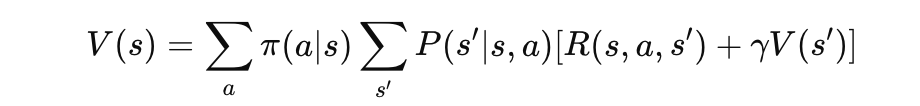

### Iterative Policy Evaluation

### Value Iteration

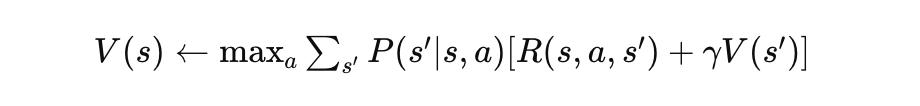

In [1]:
import numpy as np

def initialize_grid(size):
    grid = np.zeros((size, size))

    grid[0, 1] = 5
    grid[0, 4] = 2.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)

    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def main():
    Grid_size = 5
    gridworld = initialize_grid(Grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95


    current_step = [0, 1]
    action = step[1]
    next_step, reward = reward_and_transition(current_step, action, Grid_size, special_transitions)

    print("Gridworld:\n", gridworld)
    print("Step Directions:\n", step)
    print("Step Names:\n", step_c)
    print("Gamma:", gamma)
    print("Current Step:", current_step)
    print("Action:", step_c[1])
    print("Next Step:", next_step)
    print("Reward:", reward)

if __name__ == "__main__":
    main()

Gridworld:
 [[0.  5.  0.  0.  2.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Step Directions:
 [[-1  0]
 [ 1  0]
 [ 0 -1]
 [ 0  1]]
Step Names:
 ['Up', 'Down', 'Left', 'Right']
Gamma: 0.95
Current Step: [0, 1]
Action: Down
Next Step: [3, 2]
Reward: 5


In [2]:
import numpy as np

def initialize_grid(size):
    grid = np.zeros((size, size))

    grid[0, 1] = 5

    grid[0, 4] = 2.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)

    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def calculate_value_function(grid_size, step, special_transitions, gamma):
    V = np.zeros((grid_size, grid_size))
    P = np.zeros((grid_size**2, grid_size**2))
    b = np.zeros(grid_size**2)

    for i in range(grid_size):
        for j in range(grid_size):
            b_aux = 0
            for k in range(step.shape[0]):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                if (i, j) == (0, 4):  # This if is because of the 0.5 probability from the green block
                    P[grid_size * i + j, grid_size * 3 + 2] += gamma * 0.5
                    P[grid_size * i + j, grid_size * 4 + 4] += gamma * 0.5
                    b_aux += reward
                    break
                else:
                    P[grid_size * i + j, grid_size * new_step[0] + new_step[1]] += gamma * 0.25
                    b_aux += reward * 0.25

            b[grid_size * i + j] = b_aux

    A = np.eye(grid_size**2) - P
    V = np.linalg.solve(A, b).reshape((grid_size, grid_size))
    return V.round(decimals=5)

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    V = calculate_value_function(grid_size, step, special_transitions, gamma)

    print("Gridworld:\n", gridworld)
    print("Step Directions:\n", step)
    print("Step Names:\n", step_c)
    print("Gamma:", gamma)
    print("Value Function:\n", V)
    print("Max Value:", np.max(V))
    print("Location of Max Value:", np.argwhere(V == np.max(V))[0])

if __name__ == "__main__":
    main()

Gridworld:
 [[0.  5.  0.  0.  2.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Step Directions:
 [[-1  0]
 [ 1  0]
 [ 0 -1]
 [ 0  1]]
Step Names:
 ['Up', 'Down', 'Left', 'Right']
Gamma: 0.95
Value Function:
 [[ 2.171    4.73362  2.07028  1.26529  1.77912]
 [ 1.11807  1.78212  1.1741   0.73917  0.56247]
 [ 0.16279  0.47789  0.35198  0.11046 -0.18617]
 [-0.54699 -0.28473 -0.2804  -0.43991 -0.74431]
 [-1.10788 -0.84937 -0.80799 -0.93799 -1.23723]]
Max Value: 4.73362
Location of Max Value: [0 1]


In [3]:
import numpy as np

def initialize_grid(size):
    grid = np.zeros((size, size))

    # Blue Square
    grid[0, 1] = 5  # Jump to Red

    # Green Square
    grid[0, 4] = 2.5  # Jump to Yellow or Red with probability 0.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])  # Up, Down, Left, Right
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)  # Convert to tuple for dictionary keys

    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def calculate_value_function(grid_size, step, special_transitions, gamma):
    V = np.zeros((grid_size, grid_size))
    P = np.zeros((grid_size**2, grid_size**2))
    b = np.zeros(grid_size**2)

    for i in range(grid_size):
        for j in range(grid_size):
            b_aux = 0
            for k in range(step.shape[0]):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                if (i, j) == (0, 4):  # This if is because of the 0.5 probability from the green block
                    P[grid_size * i + j, grid_size * 3 + 2] += gamma * 0.5
                    P[grid_size * i + j, grid_size * 4 + 4] += gamma * 0.5
                    b_aux += reward
                    break
                else:
                    P[grid_size * i + j, grid_size * new_step[0] + new_step[1]] += gamma * 0.25
                    b_aux += reward * 0.25

            b[grid_size * i + j] = b_aux

    A = np.eye(grid_size**2) - P
    V = np.linalg.solve(A, b).reshape((grid_size, grid_size))
    return V.round(decimals=5)

def find_max_value_and_location(V):
    max_value = np.max(V)
    max_location = np.argwhere(V == max_value)[0]
    return max_value, max_location

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    V = calculate_value_function(grid_size, step, special_transitions, gamma)

    max_value, max_location = find_max_value_and_location(V)

    print("Gridworld:\n", gridworld)
    print("Step Directions:\n", step)
    print("Step Names:\n", step_c)
    print("Gamma:", gamma)
    print("Value Function:\n", V)
    print("Max Value:", max_value)
    print("Location of Max Value:", max_location)

if __name__ == "__main__":
    main()


Gridworld:
 [[0.  5.  0.  0.  2.5]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
Step Directions:
 [[-1  0]
 [ 1  0]
 [ 0 -1]
 [ 0  1]]
Step Names:
 ['Up', 'Down', 'Left', 'Right']
Gamma: 0.95
Value Function:
 [[ 2.171    4.73362  2.07028  1.26529  1.77912]
 [ 1.11807  1.78212  1.1741   0.73917  0.56247]
 [ 0.16279  0.47789  0.35198  0.11046 -0.18617]
 [-0.54699 -0.28473 -0.2804  -0.43991 -0.74431]
 [-1.10788 -0.84937 -0.80799 -0.93799 -1.23723]]
Max Value: 4.73362
Location of Max Value: [0 1]


In [4]:
def evaluate_policy(grid_size, step, special_transitions, gamma, threshold=0.0001):
    value_policy = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                value_policy_current = value_policy[i, j]
                aux = 0

                for k in range(step.shape[0]):
                    new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                    aux += 0.25 * (reward + gamma * value_policy[new_step[0], new_step[1]])

                value_policy[i, j] = aux
                delta = max(delta, abs(value_policy_current - aux))

        if delta < threshold:
            break

    return value_policy

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    value_policy = evaluate_policy(grid_size, step, special_transitions, gamma)
    policy_max_value, policy_max_location = find_max_value_and_location(value_policy)

    print("Value Policy:\n", value_policy)
    print("Max Value in Policy:", policy_max_value)
    print("Location of Max Value in Policy:", policy_max_location)

if __name__ == "__main__":
    main()

Value Policy:
 [[ 2.22041638  4.79226024  2.20154156  1.52050078  2.29226024]
 [ 1.16828339  1.84708998  1.2814004   0.91386428  0.82177337]
 [ 0.20933706  0.53510418  0.43270685  0.22401098 -0.04164667]
 [-0.50526412 -0.23623413 -0.21875609 -0.36188088 -0.65333567]
 [-1.06922357 -0.8059231  -0.75583246 -0.8757868  -1.16786543]]
Max Value in Policy: 4.792260238455376
Location of Max Value in Policy: [0 1]


### Policy Bellman equations

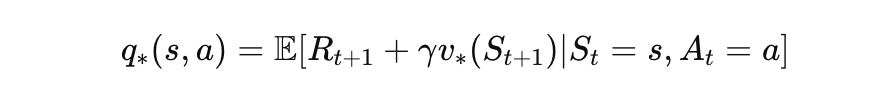

In [8]:
import matplotlib.pyplot as plt

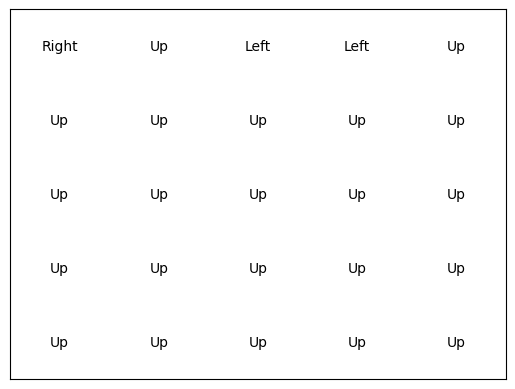

Optimal Value Function:
 [[20.99700533 22.10211088 20.99700533 19.94706036 19.60211088]
 [19.94706036 20.99700533 19.94706036 18.94970734 18.62200533]
 [18.94970734 19.94706036 18.94970734 18.00222198 17.69081036]
 [18.00222198 18.94970734 18.00222198 17.10211088 16.80626984]
 [17.10211088 18.00222198 17.10211088 16.24700533 15.96595635]]
Policy Bellman:
 [[[ 0  1]
  [-1  0]
  [ 0 -1]
  [ 0 -1]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]]


In [9]:
def initialize_grid(size):
    grid = np.zeros((size, size))

    # Blue Square
    grid[0, 1] = 5

    # Green Square
    grid[0, 4] = 2.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)

    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def evaluate_action_value_function(grid_size, step, special_transitions, gamma, threshold=0.0001):
    Q = np.zeros((grid_size, grid_size, len(step)))

    while True:
        delta = 0
        new_Q = np.copy(Q)  # Q' <- Q

        for i in range(grid_size):
            for j in range(grid_size):
                for k in range(len(step)):
                    action = step[k]
                    new_step, reward = reward_and_transition([i, j], action, grid_size, special_transitions)
                    new_Q[i, j, k] = reward + gamma * np.max(Q[new_step[0], new_step[1]])
                    delta = max(delta, abs(Q[i, j, k] - new_Q[i, j, k]))

        Q = new_Q  # Q <- Q'

        if delta < threshold:
            break

    return Q

def find_optimal_value_function(Q):
    V = np.max(Q, axis=2)
    return V

def find_max_value_and_location(V):
    max_value = np.max(V)
    max_location = np.argwhere(V == max_value)[0]
    return max_value, max_location

def get_policy(V, step, gamma, grid_size, special_transitions):
    policy_bellman = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                new_value = reward + gamma * V[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy_bellman[i, j] = best_action

    return policy_bellman

def plot_policy(policy_bellman, step, step_c, grid_size):
    matrix = [['' for _ in range(grid_size)] for _ in range(grid_size)]

    for i in range(grid_size):
        for j in range(grid_size):
            index = np.argmax(np.all(policy_bellman[i, j] == step, axis=1))
            matrix[i][j] = step_c[index]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)

    plt.show()

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    Q = evaluate_action_value_function(grid_size, step, special_transitions, gamma)
    V = find_optimal_value_function(Q)
    policy_bellman = get_policy(V, step, gamma, grid_size, special_transitions)
    plot_policy(policy_bellman, step, step_c, grid_size)

    print("Optimal Value Function:\n", V)
    print("Policy Bellman:\n", policy_bellman)

if __name__ == "__main__":
    main()


### Policy Iteration with Iterative Policy Evaluation

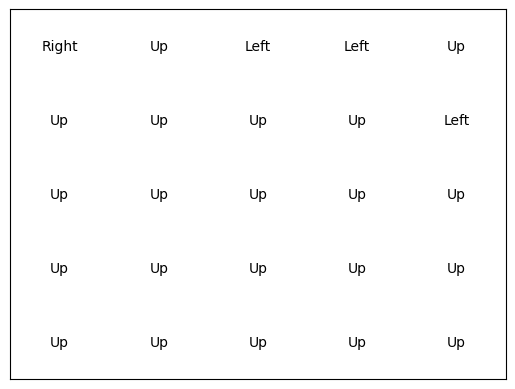

Optimal Policy:
 [[[ 0  1]
  [-1  0]
  [ 0 -1]
  [ 0 -1]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [ 0 -1]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]]
Optimal Value Function:
 [[20.99700533 22.10211088 20.99700533 19.94706036 17.16283234]
 [19.94706036 20.99700533 19.94706036 18.94970734 18.00222198]
 [18.94970734 19.94706036 18.94970734 18.00222198 17.10211088]
 [18.00222198 18.94970734 18.00222198 17.10211088 16.24700533]
 [17.10211088 18.00222198 17.10211088 16.24700533 15.43456036]]


In [10]:
def initialize_grid(size):
    grid = np.zeros((size, size))

    grid[0, 1] = 5
    grid[0, 4] = 2.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)
    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def policy_evaluation(policy, grid_size, step, special_transitions, gamma, threshold=0.0001):
    value_function = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for i in range(grid_size):
            for j in range(grid_size):
                action = policy[i, j]
                new_step, reward = reward_and_transition([i, j], action, grid_size, special_transitions)
                new_value_function[i, j] = reward + gamma * value_function[new_step[0], new_step[1]]
                delta = max(delta, abs(value_function[i, j] - new_value_function[i, j]))

        value_function = new_value_function

        if delta < threshold:
            break

    return value_function

def policy_improvement(value_function, grid_size, step, special_transitions, gamma):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy[i, j] = best_action

    return policy

def policy_iteration(grid_size, step, special_transitions, gamma, threshold=0.0001):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    policy_changed = True

    while policy_changed:
        value_function = policy_evaluation(policy, grid_size, step, special_transitions, gamma, threshold)
        new_policy = policy_improvement(value_function, grid_size, step, special_transitions, gamma)

        if np.array_equal(policy, new_policy):
            policy_changed = False
        else:
            policy = new_policy

    return policy, value_function

def plot_policy(policy, step, step_c, grid_size):
    matrix = [['' for _ in range(grid_size)] for _ in range(grid_size)]

    for i in range(grid_size):
        for j in range(grid_size):
            index = np.argmax(np.all(policy[i, j] == step, axis=1))
            matrix[i][j] = step_c[index]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)

    plt.show()

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    policy, value_function = policy_iteration(grid_size, step, special_transitions, gamma)
    plot_policy(policy, step, step_c, grid_size)

    print("Optimal Policy:\n", policy)
    print("Optimal Value Function:\n", value_function)

if __name__ == "__main__":
    main()


### Policy Value Iteration

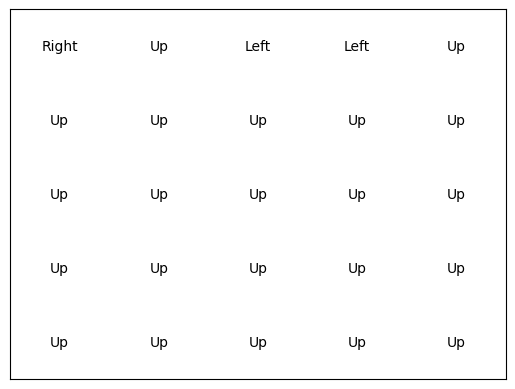

Optimal Policy:
 [[[ 0  1]
  [-1  0]
  [ 0 -1]
  [ 0 -1]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]]
Optimal Value Function:
 [[20.99700533 22.10211088 20.99700533 19.94706036 19.60211088]
 [19.94706036 20.99700533 19.94706036 18.94970734 18.62200533]
 [18.94970734 19.94706036 18.94970734 18.00222198 17.69081036]
 [18.00222198 18.94970734 18.00222198 17.10211088 16.80626984]
 [17.10211088 18.00222198 17.10211088 16.24700533 15.96595635]]


In [11]:
def initialize_grid(size):
    grid = np.zeros((size, size))

    grid[0, 1] = 5

    grid[0, 4] = 2.5

    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size, special_transitions):
    current_step = tuple(current_step)

    if current_step in special_transitions:
        next_step, reward = special_transitions[current_step]
        return next_step, reward

    next_step = np.array(current_step) + action

    if any(next_step < 0) or any(next_step >= grid_size):
        reward = -0.5
        return current_step, reward

    reward = 0
    return tuple(next_step), reward

def value_iteration(grid_size, step, special_transitions, gamma, threshold=0.0001):
    value_function = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for i in range(grid_size):
            for j in range(grid_size):
                best_value = -np.inf

                for k in range(len(step)):
                    new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                    new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                    if new_value > best_value:
                        best_value = new_value

                new_value_function[i, j] = best_value
                delta = max(delta, abs(value_function[i, j] - new_value_function[i, j]))

        value_function = new_value_function

        if delta < threshold:
            break

    return value_function

def extract_policy(value_function, grid_size, step, special_transitions, gamma):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy[i, j] = best_action

    return policy

def policy_evaluation(policy, grid_size, step, special_transitions, gamma, threshold=0.0001):
    value_function = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for i in range(grid_size):
            for j in range(grid_size):
                action = policy[i, j]
                new_step, reward = reward_and_transition([i, j], action, grid_size, special_transitions)
                new_value_function[i, j] = reward + gamma * value_function[new_step[0], new_step[1]]
                delta = max(delta, abs(value_function[i, j] - new_value_function[i, j]))

        value_function = new_value_function

        if delta < threshold:
            break

    return value_function

def policy_improvement(value_function, grid_size, step, special_transitions, gamma):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size, special_transitions)
                new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy[i, j] = best_action

    return policy

def policy_iteration(grid_size, step, special_transitions, gamma, threshold=0.0001):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    policy_changed = True

    while policy_changed:
        value_function = policy_evaluation(policy, grid_size, step, special_transitions, gamma, threshold)
        new_policy = policy_improvement(value_function, grid_size, step, special_transitions, gamma)

        if np.array_equal(policy, new_policy):
            policy_changed = False
        else:
            policy = new_policy

    return policy, value_function

def plot_policy(policy, step, step_c, grid_size):
    matrix = [['' for _ in range(grid_size)] for _ in range(grid_size)]

    for i in range(grid_size):
        for j in range(grid_size):
            index = np.argmax(np.all(policy[i, j] == step, axis=1))
            matrix[i][j] = step_c[index]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)

    plt.show()

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)

    step, step_c = get_step_directions()

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (lambda: ([4, 4], 2.5) if np.random.rand() > 0.5 else ([3, 2], 2.5))()
    }

    gamma = 0.95

    value_iteration_result = value_iteration(grid_size, step, special_transitions, gamma)

    initial_policy = extract_policy(value_iteration_result, grid_size, step, special_transitions, gamma)
    final_policy, value_function = policy_iteration(grid_size, step, special_transitions, gamma)

    plot_policy(final_policy, step, step_c, grid_size)

    print("Optimal Policy:\n", final_policy)
    print("Optimal Value Function:\n", value_function)

if __name__ == "__main__":
    main()

### Part 2
Now let’s change the environment a bit by adding some terminal states represented as the black squares. This gives rise to episodes where termination occurs once the agent hits one of the black squares. We will also assume, unlike in Part 1, that any move from a white square to a white square yields a reward of -0.2.

1. Use the Monte Carlo method with (1) exploring starts and (2) without exploring starts but the
ϵ-soft approach to learn an optimal policy for this modified gridworld problem. Use the same
discount factor of γ = 0.95 as you have in the Part 1 above. You can start with a policy with
equiprobable moves.
2. Now use a behaviour policy with equiprobable moves to learn an optimal policy. Note here the
dynamics of the world are known exactly, so you can actually compute the importance weights
needed for this.
3. Finally, let’s suppose that at every step, we permute the locations of the green and blue squares
with probability 0.1, while preserving the rewards and transition structure as before. Use policy
iteration to determine a suitable policy for this environment. How does it differ from the case
where the squares stay where they are? This is a bit more of an open-ended question for you to
think about how to address such problems.

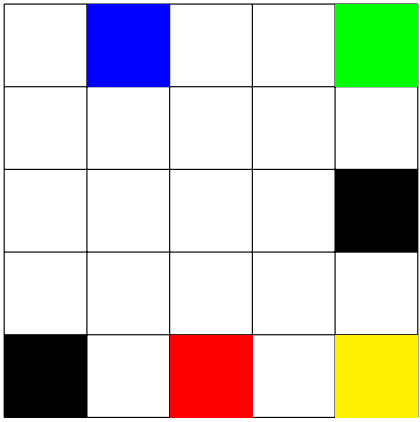

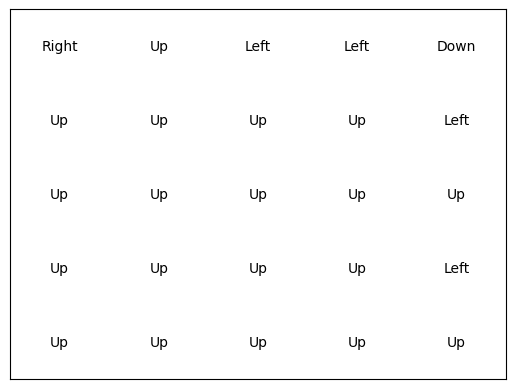

Optimal Policy:
 [[[ 0  1]
  [-1  0]
  [ 0 -1]
  [ 0 -1]
  [ 1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [ 0 -1]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [ 0 -1]]

 [[-1  0]
  [-1  0]
  [-1  0]
  [-1  0]
  [-1  0]]]
Optimal Value Function:
 [[17.83696131 18.98627108 17.83696131 16.74501854 15.59696131]
 [16.74501854 17.83696131 16.74501854 15.7077714  14.72238662]
 [15.7077714  16.74501854 15.7077714  14.72238662  0.        ]
 [14.72238662 15.7077714  14.72238662 13.78627108 12.89696131]
 [ 0.         14.72238662 13.78627108 12.89696131 12.05201854]]


In [12]:
import random

def initialize_grid(size):
    grid = np.zeros((size, size))
    grid[0, 1] = 5
    grid[0, 4] = 2.5
    return grid

def get_step_directions():
    directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    direction_names = ["Up", "Down", "Left", "Right"]
    return directions, direction_names

def reward_and_transition(current_step, action, grid_size):
    current_step = tuple(current_step)

    special_transitions = {
        (0, 1): ([3, 2], 5),
        (0, 4): (random.choice([[4, 2], [4, 4]]), 2.5),
        (2, 4): ([2, 4], 0),
        (4, 0): ([4, 0], 0)
    }

    if current_step in special_transitions:
        return special_transitions[current_step]

    next_step = list(np.add(current_step, action))

    if next_step[0] < 0 or next_step[0] >= grid_size or next_step[1] < 0 or next_step[1] >= grid_size:
        return list(current_step), -0.5

    return next_step, -0.2

def value_iteration(grid_size, step, gamma, threshold=0.0001):
    value_function = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for i in range(grid_size):
            for j in range(grid_size):
                best_value = -np.inf

                for k in range(len(step)):
                    new_step, reward = reward_and_transition([i, j], step[k], grid_size)
                    new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                    if new_value > best_value:
                        best_value = new_value

                new_value_function[i, j] = best_value
                delta = max(delta, abs(value_function[i, j] - new_value_function[i, j]))

        value_function = new_value_function

        if delta < threshold:
            break

    return value_function

def extract_policy(value_function, grid_size, step, gamma):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size)
                new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy[i, j] = best_action

    return policy

def policy_evaluation(policy, grid_size, step, gamma, threshold=0.0001):
    value_function = np.zeros((grid_size, grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for i in range(grid_size):
            for j in range(grid_size):
                action = policy[i, j]
                new_step, reward = reward_and_transition([i, j], action, grid_size)
                new_value_function[i, j] = reward + gamma * value_function[new_step[0], new_step[1]]
                delta = max(delta, abs(value_function[i, j] - new_value_function[i, j]))

        value_function = new_value_function

        if delta < threshold:
            break

    return value_function

def policy_improvement(value_function, grid_size, step, gamma):
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)

    for i in range(grid_size):
        for j in range(grid_size):
            best_value = -np.inf
            best_action = step[0]

            for k in range(len(step)):
                new_step, reward = reward_and_transition([i, j], step[k], grid_size)
                new_value = reward + gamma * value_function[new_step[0], new_step[1]]
                if new_value > best_value:
                    best_value = new_value
                    best_action = step[k]

            policy[i, j] = best_action

    return policy

def policy_iteration(grid_size, step, gamma, threshold=0.0001):
    value_function = value_iteration(grid_size, step, gamma, threshold)
    policy = extract_policy(value_function, grid_size, step, gamma)

    while True:
        value_function = policy_evaluation(policy, grid_size, step, gamma, threshold)
        new_policy = policy_improvement(value_function, grid_size, step, gamma)

        if np.array_equal(policy, new_policy):
            break
        policy = new_policy

    return policy, value_function

def plot_policy(policy, step, step_c, grid_size):
    matrix = [['' for _ in range(grid_size)] for _ in range(grid_size)]

    for i in range(grid_size):
        for j in range(grid_size):
            index = np.argmax(np.all(policy[i, j] == step, axis=1))
            matrix[i][j] = step_c[index]

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)

    plt.show()

def main():
    grid_size = 5
    gridworld = initialize_grid(grid_size)
    step, step_c = get_step_directions()
    gamma = 0.95

    policy, value_function = policy_iteration(grid_size, step, gamma)
    plot_policy(policy, step, step_c, grid_size)

    print("Optimal Policy:\n", policy)
    print("Optimal Value Function:\n", value_function)

if __name__ == "__main__":
    main()

### Monte Carlo Exploring Start

In [17]:
import random

In [18]:
Grid_size = 5
Terminal_States = [[3, 4], [4, 0]]
gamma = 0.95
alpha = 0.1
step = [[-1, 0], [1, 0], [0, -1], [0, 1]]
Policy = {(i, j): step[np.random.randint(4)] for i in range(Grid_size) for j in range(Grid_size)}

def Reward_And_Transition_Part_2(Current_Step, Action):
    if Current_Step == [0, 1]:
        return [3, 2], 5
    elif Current_Step == [0, 4]:
        return random.choice([[4, 2], [4, 4]]), 2.5
    elif Current_Step == [2, 4] or Current_Step == [4, 0]:
        return Current_Step, 0
    Next_Step = list(np.add(Current_Step, Action))
    if Next_Step[0] < 0 or Next_Step[0] >= Grid_size or Next_Step[1] < 0 or Next_Step[1] >= Grid_size:
        return Current_Step, -1
    return Next_Step, -0.1

def Generate_Episode(Policy, Current_State, Step_limit=1000):
    Episode_list = []
    Step_Count = 0
    while Step_Count < Step_limit:
        Action = Policy[tuple(Current_State)]
        New_Step, Reward = Reward_And_Transition_Part_2(Current_State, Action)
        Episode_list.append((Current_State, Action, Reward))
        if New_Step in Terminal_States:
            break
        Current_State = New_Step
        Step_Count += 1
    return Episode_list

def Returns(Episode_list):
    G = 0
    Return_list = []
    for state, action, reward in reversed(Episode_list):
        G = gamma * G + reward
        Return_list.append((state, action, G))
    Return_list.reverse()
    return Return_list

def Update(Return_list, V_MC, Policy, Q, Returns_count):
    for state, action, G in Return_list:
        state_tuple = tuple(state)
        action_tuple = tuple(action)
        Q[state_tuple][action_tuple] += (G - Q[state_tuple][action_tuple]) / Returns_count[state_tuple][action_tuple]
        V_MC[state_tuple] = np.max(list(Q[state_tuple].values()))
        best_action = max(Q[state_tuple], key=Q[state_tuple].get)
        Policy[state_tuple] = best_action
    return V_MC, Policy

def Monte_Carlo_ES(V_MC, Policy, Num_episodes=5000):
    Q = {(i, j): {tuple(a): 0 for a in step} for i in range(Grid_size) for j in range(Grid_size)}
    Returns_count = {(i, j): {tuple(a): 0 for a in step} for i in range(Grid_size) for j in range(Grid_size)}

    for _ in range(Num_episodes):
        Start_State = np.random.randint(0, 5, 2).tolist()
        Episode_list = Generate_Episode(Policy, Start_State, Step_limit=100)
        Return_list = Returns(Episode_list)
        for state, action, G in Return_list:
            Returns_count[tuple(state)][tuple(action)] += 1
        V_MC, Policy = Update(Return_list, V_MC, Policy, Q, Returns_count)

    return V_MC, Policy

V_MC = np.zeros((Grid_size, Grid_size))
Policy = {(i, j): step[np.random.randint(4)] for i in range(Grid_size) for j in range(Grid_size)}
V_MC, Policy = Monte_Carlo_ES(V_MC, Policy, Num_episodes=3000)

print("Optimal Value Function (V_MC):")
print(V_MC)

print("\nOptimal Policy:")
for key, value in Policy.items():
    print(f"{key}: {value}")

Optimal Value Function (V_MC):
[[ 4.31518378  4.64756188  4.31518378  3.99942459  2.31795497]
 [ 1.33432798  1.51505363  1.70556363  1.63091452  2.10155591]
 [-0.3709875  -0.28525    -0.195      -0.1         0.        ]
 [-0.1        -0.45243813 -0.41582324 -0.1        -0.1       ]
 [ 0.         -0.1        -0.31308782 -0.20892514 -0.1       ]]

Optimal Policy:
(0, 0): (0, 1)
(0, 1): (-1, 0)
(0, 2): (0, -1)
(0, 3): (0, -1)
(0, 4): (0, -1)
(1, 0): (0, 1)
(1, 1): (0, 1)
(1, 2): (0, 1)
(1, 3): (0, 1)
(1, 4): (-1, 0)
(2, 0): (0, 1)
(2, 1): (0, 1)
(2, 2): (0, 1)
(2, 3): (0, 1)
(2, 4): (-1, 0)
(3, 0): (1, 0)
(3, 1): (0, 1)
(3, 2): (1, 0)
(3, 3): (0, 1)
(3, 4): (-1, 0)
(4, 0): (-1, 0)
(4, 1): (0, -1)
(4, 2): (0, 1)
(4, 3): (-1, 0)
(4, 4): (-1, 0)


### Monte Carlo E-Greedy

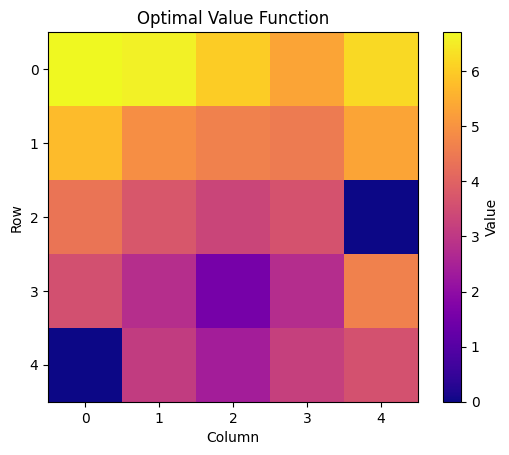

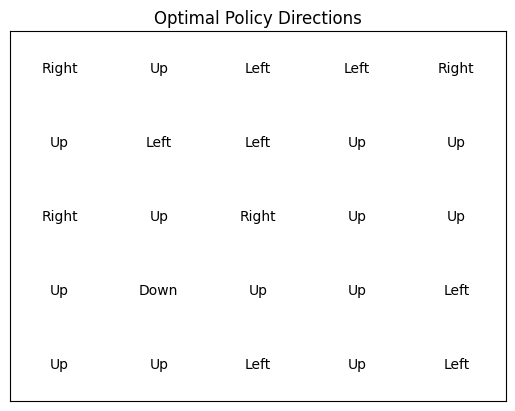

In [22]:
Grid_size = 5
Terminal_States = [[3, 4], [4, 0]]
gamma = 0.95
epsilon = 0.1
step = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
step_c = ["Up", "Down", "Left", "Right"]

def calculate_reward_and_transition(current_state, action):
    if current_state == [0, 1]:
        return [3, 2], 5
    elif current_state == [0, 4]:
        return random.choice([[4, 2], [4, 4]]), 2.5
    elif current_state == [2, 4] or current_state == [4, 0]:
        return current_state, 0
    next_state = list(np.add(current_state, action))
    if next_state[0] < 0 or next_state[0] >= Grid_size or next_state[1] < 0 or next_state[1] >= Grid_size:
        return current_state, -1
    return next_state, -0.1

def generate_episode_soft_policy(Q, current_state, epsilon=0.1, step_limit=100):
    episode = []
    step_count = 0
    while step_count < step_limit:
        if random.uniform(0, 1) < epsilon:
            action = step[np.random.randint(4)]
        else:
            values = [Q[(tuple(current_state), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            action = step[highest_index]
        next_state, reward = calculate_reward_and_transition(current_state, action)
        episode.append([current_state, action, reward])
        current_state = next_state
        step_count += 1
        if current_state in Terminal_States:
            break
    return episode

def update_action_values(episode, Q, N):
    G = 0
    visited = []
    for state, action, reward in reversed(episode):
        G = reward + gamma * G
        state_action_pair = (tuple(state), tuple(action))
        if state_action_pair not in visited:
            N[state_action_pair] += 1
            Q[state_action_pair] += (G - Q[state_action_pair]) / N[state_action_pair]
            visited.append(state_action_pair)
    return Q

def derive_policy(Q, Policy, epsilon=0.1):
    for i in range(Grid_size):
        for j in range(Grid_size):
            values = [Q[(tuple([i, j]), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            Policy[(i, j)] = {}
            for k in range(step.shape[0]):
                if k == highest_index:
                    Policy[(i, j)][tuple(step[k])] = (1 - epsilon) + (epsilon / step.shape[0])
                else:
                    Policy[(i, j)][tuple(step[k])] = epsilon / step.shape[0]
    return Policy

def monte_carlo_soft_policy(Q, N, Policy, num_episodes=3000, epsilon=0.1):
    for _ in range(num_episodes):
        start_state = np.random.randint(0, 5, 2).tolist()
        episode = generate_episode_soft_policy(Q, start_state, epsilon, step_limit=100)
        Q = update_action_values(episode, Q, N)
        Policy = derive_policy(Q, Policy, epsilon)
    return Policy, Q

def visualize_matrix(Q):
    final_q_values = {}
    final_q_directions = {}
    for i in range(Grid_size):
        for j in range(Grid_size):
            values = [Q[(tuple([i, j]), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            final_q_values[(i, j)] = Q[(tuple([i, j]), tuple(step[highest_index]))]
            final_q_directions[(i, j)] = step_c[highest_index]

    matrix = np.zeros((Grid_size, Grid_size))
    for (x, y), value in final_q_values.items():
        matrix[x, y] = value

    plt.imshow(matrix, cmap='plasma', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title('Optimal Value Function')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(range(Grid_size))
    plt.yticks(range(Grid_size))
    plt.show()

    rows, cols = Grid_size, Grid_size
    matrix = [['' for _ in range(cols)] for _ in range(rows)]
    for (row, col), direction in final_q_directions.items():
        matrix[row][col] = direction

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, matrix[i][j], va='center', ha='center')
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    plt.title('Optimal Policy Directions')
    plt.show()

Q = {((i, j), tuple(step[k])): 0.0 for i in range(Grid_size) for j in range(Grid_size) for k in range(step.shape[0])}
N = {((i, j), tuple(step[k])): 0.0 for i in range(Grid_size) for j in range(Grid_size) for k in range(step.shape[0])}
Policy = {}

Policy, Q = monte_carlo_soft_policy(Q, N, Policy, num_episodes=100000, epsilon=0.1)

visualize_matrix(Q)


Second Part

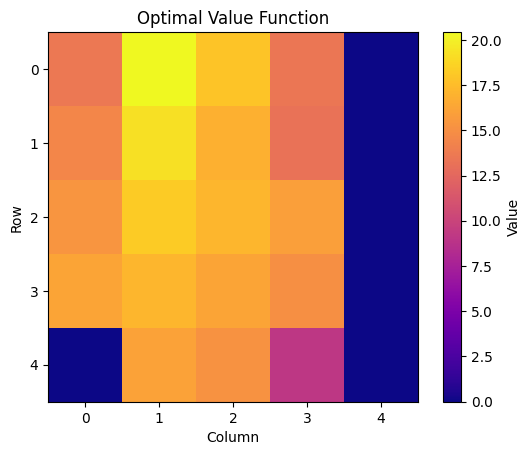

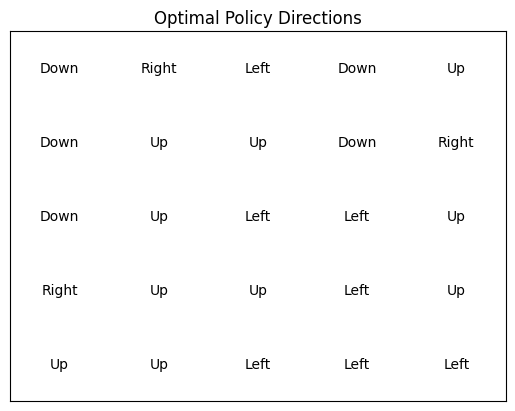

In [21]:
Grid_size = 5
Terminal_States = [[3, 4], [4, 0]]
gamma = 0.95
epsilon = 0.1
step = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
step_c = ["Up", "Down", "Left", "Right"]

def compute_reward_and_transition(current_state, action):
    if current_state == [0, 1]:
        return [3, 2], 5
    elif current_state == [0, 4]:
        return random.choice([[4, 2], [4, 4]]), 2.5
    elif current_state == [2, 4] or current_state == [4, 0]:
        return current_state, 0
    next_state = list(np.add(current_state, action))
    if next_state[0] < 0 or next_state[0] >= Grid_size or next_state[1] < 0 or next_state[1] >= Grid_size:
        return current_state, -1
    return next_state, -0.1

def generate_episode_epsilon_soft(Q, current_state, epsilon=0.1, step_limit=100):
    episode = []
    step_count = 0
    while step_count < step_limit:
        if random.uniform(0, 1) < epsilon:
            action = step[np.random.randint(4)]
        else:
            values = [Q[(tuple(current_state), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            action = step[highest_index]
        next_state, reward = compute_reward_and_transition(current_state, action)
        episode.append([current_state, action, reward])
        current_state = next_state
        step_count += 1
        if current_state in Terminal_States:
            break
    return episode

def update_q_and_policy(episode, Q, C, Policy):
    G = 0
    W = 1
    for state, action, reward in reversed(episode):
        G = reward + gamma * G
        state_action_pair = (tuple(state), tuple(action))
        C[state_action_pair] += W
        Q[state_action_pair] += (W / C[state_action_pair]) * (G - Q[state_action_pair])
        values = [Q[(tuple(state), tuple(step[k]))] for k in range(step.shape[0])]
        highest_index = values.index(max(values))
        Policy[tuple(state)] = step[highest_index]
        if tuple(action) != tuple(Policy[tuple(state)]):
            break
        W *= 2
    return Policy

def derive_policy_from_q(Q, Policy, epsilon=0.1):
    for i in range(Grid_size):
        for j in range(Grid_size):
            values = [Q[(tuple([i, j]), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            Policy[(i, j)] = {}
            for k in range(step.shape[0]):
                if k == highest_index:
                    Policy[(i, j)][tuple(step[k])] = (1 - epsilon) + (epsilon / step.shape[0])
                else:
                    Policy[(i, j)][tuple(step[k])] = epsilon / step.shape[0]
    return Policy

def monte_carlo_with_importance_sampling(Q, C, Policy, num_episodes=3000, epsilon=0.1):
    for _ in range(num_episodes):
        start_state = np.random.randint(0, 5, 2).tolist()
        episode = generate_episode_epsilon_soft(Q, start_state, epsilon, step_limit=100)
        Policy = update_q_and_policy(episode, Q, C, Policy)
    return Policy, Q

def visualize_policy_and_value(Q, Policy):
    final_q_values = {}
    final_q_directions = {}
    for i in range(Grid_size):
        for j in range(Grid_size):
            values = [Q[(tuple([i, j]), tuple(step[k]))] for k in range(step.shape[0])]
            highest_index = values.index(max(values))
            final_q_values[(i, j)] = Q[(tuple([i, j]), tuple(step[highest_index]))]
            final_q_directions[(i, j)] = step_c[highest_index]

    matrix = np.zeros((Grid_size, Grid_size))
    for (x, y), value in final_q_values.items():
        matrix[x, y] = value

    plt.imshow(matrix, cmap='plasma', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title('Optimal Value Function')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(range(Grid_size))
    plt.yticks(range(Grid_size))
    plt.show()

    rows, cols = Grid_size, Grid_size
    matrix = [['' for _ in range(cols)] for _ in range(rows)]
    for (row, col), direction in final_q_directions.items():
        matrix[row][col] = direction

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, matrix[i][j], va='center', ha='center')
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    plt.title('Optimal Policy Directions')
    plt.show()

Q = {((i, j), tuple(step[k])): 0.0 for i in range(Grid_size) for j in range(Grid_size) for k in range(step.shape[0])}
C = {((i, j), tuple(step[k])): 0.0 for i in range(Grid_size) for j in range(Grid_size) for k in range(step.shape[0])}
Policy = {((i, j)): [0, 0] for i in range(Grid_size) for j in range(Grid_size)}

Policy, Q = monte_carlo_with_importance_sampling(Q, C, Policy, num_episodes=5000, epsilon=0.1)

visualize_policy_and_value(Q, Policy)

Third Part